In [1]:
""" required packages to run model """
import pandas as pd  # for manipulating dataframes
from datetime import datetime # for converting date and time

from sklearn.preprocessing import LabelEncoder  # encoding data
from sklearn.model_selection import train_test_split  # splitting data
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler  # scaling data between 2 values
from sklearn.feature_selection import SelectKBest, f_classif  # feature engineering models
import xgboost as xgbo # showing features impact

from sklearn.linear_model import LogisticRegression# Tested Models
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier


from sklearn.metrics import classification_report  # for evaluating results
from sklearn.metrics import confusion_matrix  # for evaluating results
import matplotlib.pyplot as plt  # plotting data
import seaborn as sns  # plotting data


""" read train data """
train_data = pd.read_csv("Train.csv")
""" exploring train data """
train_data.shape  # shape of train data (how many lines and columns)


(2100, 27)

# Data Mining

In [2]:
train_data.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#statistics around th train dataset
train_data.describe()


,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
count,2.100000e+03,2.100000e+03,2100.0,2100.000000,1.488000e+03,1488.000000,1488.000000,1488.000000
mean,5.302947e+04,-5.291354e+04,256.0,0.708571,1.182725e+04,0.731855,0.982527,0.119624
std,1.539498e+05,1.539653e+05,0.0,0.454529,7.666506e+04,0.443143,0.131070,0.324630
min,1.000000e+02,-2.500000e+06,256.0,0.000000,5.000000e+01,0.000000,0.000000,0.000000
25%,1.000000e+03,-1.200000e+04,256.0,0.000000,1.113750e+03,0.000000,1.000000,0.000000
50%,3.500000e+03,-3.500000e+03,256.0,1.000000,2.800000e+03,1.000000,1.000000,0.000000
75%,1.200000e+04,-1.000000e+03,256.0,1.000000,1.050000e+04,1.000000,1.000000,0.000000
max,2.500000e+06,-1.000000e+02,256.0,1.000000,2.760000e+06,1.000000,1.000000,1.000000


In [4]:
""" read test data """
test_data_for_csv = pd.read_csv("Test.csv")
test_data = pd.read_csv("Test.csv")
""" exploring test data """
test_data.columns

Index(['CustomerId', 'TransactionStartTime', 'Value', 'Amount',
       'TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode',
       'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStatus', 'IssuedDateLoan', 'LoanId',
       'InvestorId', 'LoanApplicationId', 'ThirdPartyId'],
      dtype='object')

In [5]:
test_data.shape

(905, 19)

In [6]:
test_data.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_310,3/31/2019 13:33,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 13:33,LoanId_1027,InvestorId_1,LoanApplicationId_825,ThirdPartyId_1175
1,CustomerId_243,3/31/2019 15:04,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,3/31/2019 15:04,LoanId_768,InvestorId_1,LoanApplicationId_68,ThirdPartyId_604
2,CustomerId_142,3/31/2019 17:31,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 17:31,LoanId_1067,InvestorId_1,LoanApplicationId_1223,ThirdPartyId_1521
3,CustomerId_142,3/31/2019 17:32,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 17:32,LoanId_202,InvestorId_1,LoanApplicationId_633,ThirdPartyId_406
4,CustomerId_142,3/31/2019 17:34,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 17:34,LoanId_533,InvestorId_1,LoanApplicationId_309,ThirdPartyId_302


In [7]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows',3000)

In [8]:
train_data.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,AmountLoan,Currency,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train_data.nunique()

CustomerId                421
TransactionStartTime     1606
Value                      98
Amount                     77
TransactionId            1758
BatchId                  1713
SubscriptionId              6
CurrencyCode                1
CountryCode                 1
ProviderId                  1
ProductId                  16
ProductCategory             7
ChannelId                   1
TransactionStatus           2
IssuedDateLoan           1101
AmountLoan                647
Currency                    1
LoanId                   1159
PaidOnDate               1427
IsFinalPayBack              2
InvestorId                  3
DueDate                  1101
LoanApplicationId        1156
PayBackId                1485
ThirdPartyId             1481
IsThirdPartyConfirmed       2
IsDefaulted                 2
dtype: int64

In [10]:
""" dropping unecessary rows (NAN ) and columns (see below)
 We've decided to drop these columns after some feature engineering 
"""
train_data = train_data.dropna()


In [11]:
#Convert TransactionStartTime in datetime and separate day/month/year/minute/second
train_data['TransactionStartTime'] =  pd.to_datetime(train_data['TransactionStartTime'])
train_data['TransactionStartTime_day'] = train_data['TransactionStartTime'].dt.day
train_data['TransactionStartTime_month'] = train_data['TransactionStartTime'].dt.month
train_data['TransactionStartTime_year'] = train_data['TransactionStartTime'].dt.year
train_data['TransactionStartTime_minute'] = train_data['TransactionStartTime'].dt.minute
train_data['TransactionStartTime_hour'] = train_data['TransactionStartTime'].dt.hour

#train_data['TransactionStartTime']

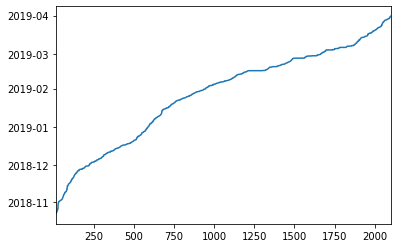

In [12]:
#Analysing the train dataset during time from october 2018 until April 2019
#Number of transaction during these months
train_data['TransactionStartTime'].plot()

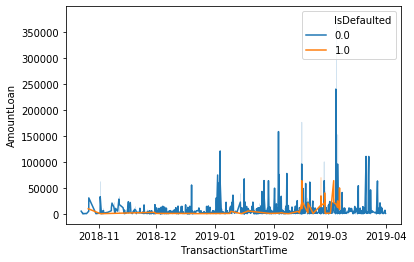

In [13]:
# Analysing Amountloan during the period with default paiement or not
normalised_data = train_data.loc[train_data['Value'] <= 500000]

ax = sns.lineplot(y="AmountLoan", x="TransactionStartTime", hue="IsDefaulted",
                  data=normalised_data)

In [14]:
train_data.nunique()

CustomerId                      238
TransactionStartTime           1095
Value                            85
Amount                           69
TransactionId                  1149
BatchId                        1122
SubscriptionId                    5
CurrencyCode                      1
CountryCode                       1
ProviderId                        1
ProductId                        15
ProductCategory                   7
ChannelId                         1
TransactionStatus                 1
IssuedDateLoan                 1098
AmountLoan                      641
Currency                          1
LoanId                         1153
PaidOnDate                     1418
IsFinalPayBack                    2
InvestorId                        3
DueDate                        1098
LoanApplicationId              1153
PayBackId                      1476
ThirdPartyId                   1474
IsThirdPartyConfirmed             2
IsDefaulted                       2
TransactionStartTime_day    

In [15]:
train_data.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,AmountLoan,Currency,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted,TransactionStartTime_day,TransactionStartTime_month,TransactionStartTime_year,TransactionStartTime_minute,TransactionStartTime_hour
15,CustomerId_233,2018-10-22 16:04:00,5000.0,-5000.0,TransactionId_2632,BatchId_775,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,10/22/2018 16:04,5375.0,UGX,LoanId_317,10/30/2018 6:49,1.0,InvestorId_3,11/21/2018 16:03,LoanApplicationId_1629,PayBackId_1719,ThirdPartyId_1010,0.0,0.0,22,10,2018,4,16
17,CustomerId_305,2018-10-23 13:12:00,500.0,-500.0,TransactionId_1297,BatchId_2016,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,10/23/2018 13:12,543.0,UGX,LoanId_1619,10/23/2018 13:18,1.0,InvestorId_2,11/22/2018 13:12,LoanApplicationId_136,PayBackId_725,ThirdPartyId_1566,0.0,0.0,23,10,2018,12,13
18,CustomerId_27,2018-10-23 15:20:00,1000.0,-1000.0,TransactionId_1367,BatchId_1675,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,10/23/2018 15:20,1085.0,UGX,LoanId_1438,10/23/2018 15:26,1.0,InvestorId_2,11/22/2018 15:20,LoanApplicationId_1171,PayBackId_1085,ThirdPartyId_1265,0.0,0.0,23,10,2018,20,15
19,CustomerId_27,2018-10-23 15:31:00,500.0,-500.0,TransactionId_871,BatchId_2449,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,10/24/2018 6:34,543.0,UGX,LoanId_1304,10/24/2018 6:38,1.0,InvestorId_2,11/23/2018 6:33,LoanApplicationId_702,PayBackId_763,ThirdPartyId_1962,0.0,0.0,23,10,2018,31,15
20,CustomerId_27,2018-10-24 06:56:00,500.0,-500.0,TransactionId_1019,BatchId_1564,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_4,data_bundles,ChannelId_1,1,10/24/2018 6:56,543.0,UGX,LoanId_1436,10/24/2018 7:01,1.0,InvestorId_2,11/23/2018 6:55,LoanApplicationId_508,PayBackId_1228,ThirdPartyId_2008,0.0,0.0,24,10,2018,56,6


In [16]:
train_data = train_data.drop(['CurrencyCode','CountryCode','ProviderId','ChannelId','TransactionStatus','CustomerId'
                              ,'TransactionId','BatchId','SubscriptionId','ProviderId','ChannelId','TransactionStatus','Currency','LoanId','InvestorId'
                              ,'LoanApplicationId','ThirdPartyId'], axis=1)  # axis = 1 to drop columns not lines
train_data.shape

(1479, 18)

In [17]:
test_data.columns

test_data = test_data.drop(['CustomerId','TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode',
                            'CountryCode','ProviderId','ChannelId','TransactionStatus','LoanId',
                            'InvestorId', 'LoanApplicationId', 'ThirdPartyId'], axis=1)
test_data.shape

(905, 6)

In [18]:
train_data.columns

Index(['TransactionStartTime', 'Value', 'Amount', 'ProductId',
       'ProductCategory', 'IssuedDateLoan', 'AmountLoan', 'PaidOnDate',
       'IsFinalPayBack', 'DueDate', 'PayBackId', 'IsThirdPartyConfirmed',
       'IsDefaulted', 'TransactionStartTime_day', 'TransactionStartTime_month',
       'TransactionStartTime_year', 'TransactionStartTime_minute',
       'TransactionStartTime_hour'],
      dtype='object')

In [19]:
test_data.columns

Index(['TransactionStartTime', 'Value', 'Amount', 'ProductId',
       'ProductCategory', 'IssuedDateLoan'],
      dtype='object')

In [20]:

""" get list of categorical features """
categorical_features = ['ProductId','ProductCategory','TransactionStartTime_month']
#['TransactionStartTime','IssuedDateLoan','PaidOnDate','DueDate']

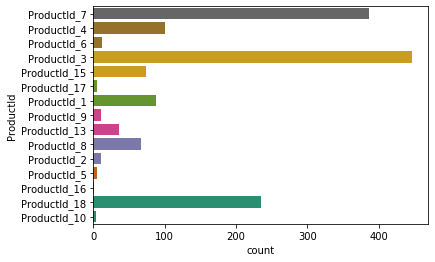

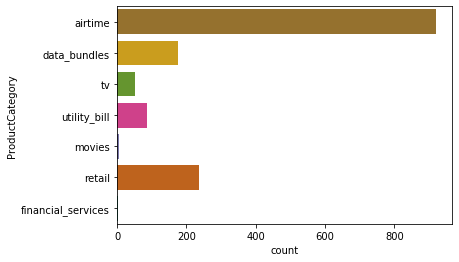

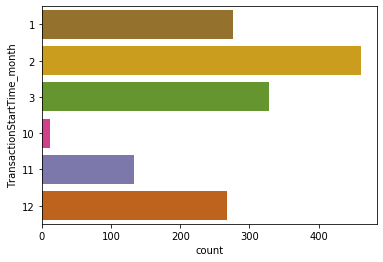

In [21]:
""" plot categorical features """

for i, categorical_feature in enumerate(categorical_features):
    m = sns.countplot(data=train_data, y = categorical_feature, palette='Dark2_r', orient = 'v')#.set_title(categorical_feature)
    plt.show()

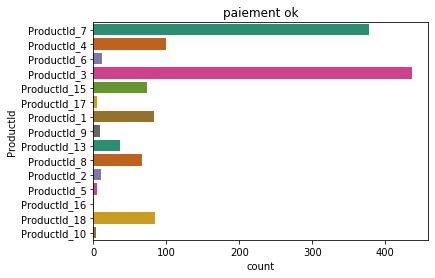

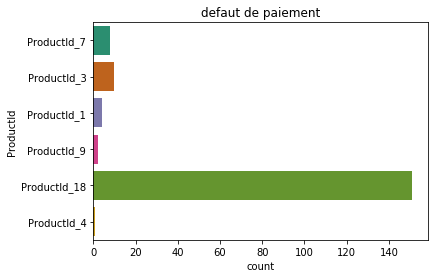

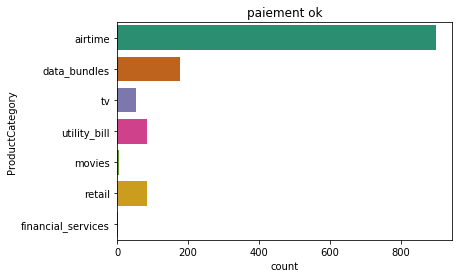

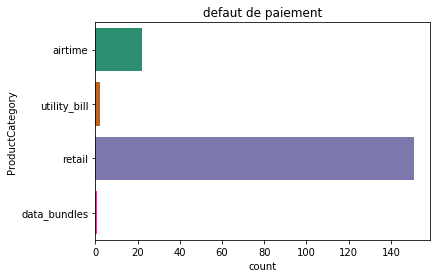

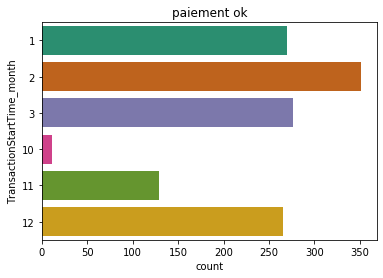

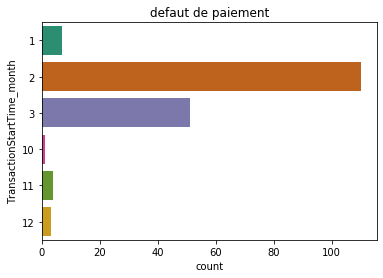

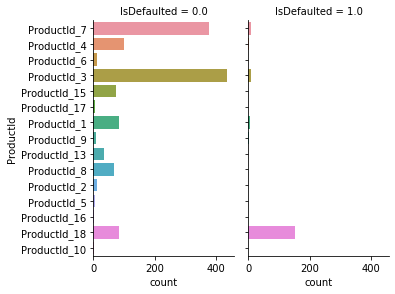

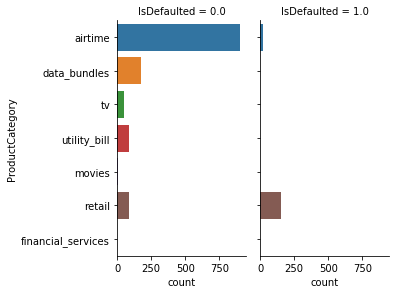

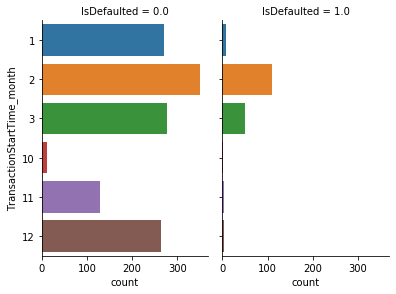

In [22]:
""" plot categorical features with the target variable """  # Men are more likely to have bank account than women
for feature in categorical_features:
    m = sns.countplot(data=train_data[train_data.IsDefaulted == 0], y = feature, palette='Dark2', orient = 'v').set_title("paiement ok")
    plt.show()
    m = sns.countplot(data=train_data[train_data.IsDefaulted == 1], y = feature, palette='Dark2', orient = 'v').set_title("defaut de paiement")
    plt.show()
    
for feature in categorical_features:
    g = sns.catplot(y=feature, col="IsDefaulted",data=train_data, kind="count", height=4, aspect=.7);


In [23]:
""" plot numerical features """
train_data.info()

# It enables to select numerical features to plot

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 15 to 2099
Data columns (total 18 columns):
TransactionStartTime           1479 non-null datetime64[ns]
Value                          1479 non-null float64
Amount                         1479 non-null float64
ProductId                      1479 non-null object
ProductCategory                1479 non-null object
IssuedDateLoan                 1479 non-null object
AmountLoan                     1479 non-null float64
PaidOnDate                     1479 non-null object
IsFinalPayBack                 1479 non-null float64
DueDate                        1479 non-null object
PayBackId                      1479 non-null object
IsThirdPartyConfirmed          1479 non-null float64
IsDefaulted                    1479 non-null float64
TransactionStartTime_day       1479 non-null int64
TransactionStartTime_month     1479 non-null int64
TransactionStartTime_year      1479 non-null int64
TransactionStartTime_minute    1479 non-null int6

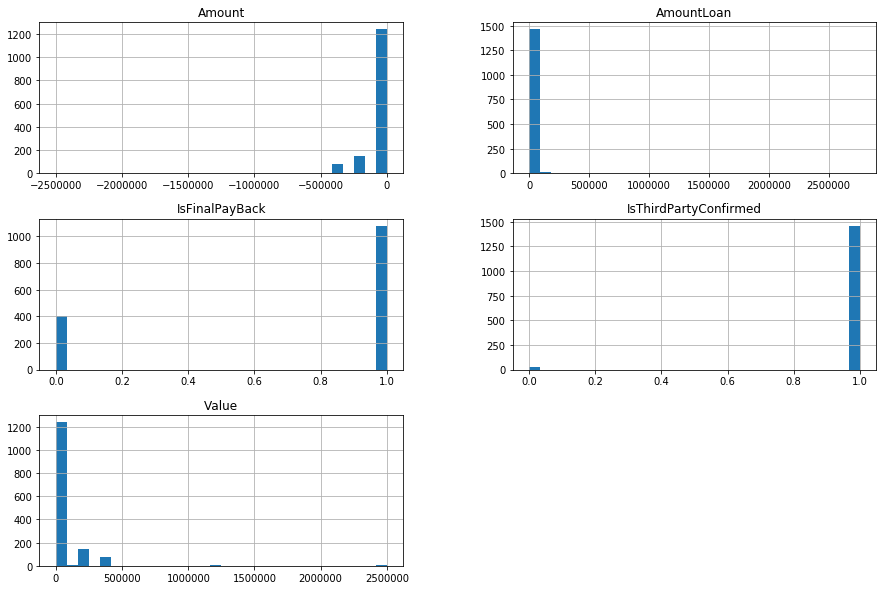

In [24]:
numerical_features = ['Value', 'Amount','AmountLoan','IsFinalPayBack','IsThirdPartyConfirmed']
train_data[numerical_features].describe()
train_data[numerical_features].hist(bins=30, figsize=(15, 10))
#for features in numerical_features:
 #   m = sns.distplot(train_data[features],bins=30)
plt.show()

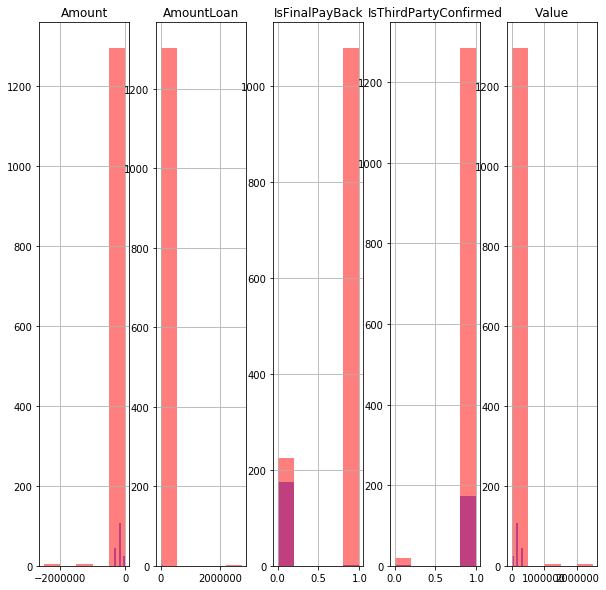

In [25]:
""" plot numerical features with the target variable """
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
train_data[train_data.IsDefaulted == 1][numerical_features].hist(bins=5, color="blue", alpha=0.5, ax=ax)
train_data[train_data.IsDefaulted == 0][numerical_features].hist(bins=5, color="red", alpha=0.5, ax=ax)
plt.show()



In [26]:
train_data.head()

,TransactionStartTime,Value,Amount,ProductId,ProductCategory,IssuedDateLoan,AmountLoan,PaidOnDate,IsFinalPayBack,DueDate,PayBackId,IsThirdPartyConfirmed,IsDefaulted,TransactionStartTime_day,TransactionStartTime_month,TransactionStartTime_year,TransactionStartTime_minute,TransactionStartTime_hour
15,2018-10-22 16:04:00,5000.0,-5000.0,ProductId_7,airtime,10/22/2018 16:04,5375.0,10/30/2018 6:49,1.0,11/21/2018 16:03,PayBackId_1719,0.0,0.0,22,10,2018,4,16
17,2018-10-23 13:12:00,500.0,-500.0,ProductId_7,airtime,10/23/2018 13:12,543.0,10/23/2018 13:18,1.0,11/22/2018 13:12,PayBackId_725,0.0,0.0,23,10,2018,12,13
18,2018-10-23 15:20:00,1000.0,-1000.0,ProductId_7,airtime,10/23/2018 15:20,1085.0,10/23/2018 15:26,1.0,11/22/2018 15:20,PayBackId_1085,0.0,0.0,23,10,2018,20,15
19,2018-10-23 15:31:00,500.0,-500.0,ProductId_7,airtime,10/24/2018 6:34,543.0,10/24/2018 6:38,1.0,11/23/2018 6:33,PayBackId_763,0.0,0.0,23,10,2018,31,15
20,2018-10-24 06:56:00,500.0,-500.0,ProductId_4,data_bundles,10/24/2018 6:56,543.0,10/24/2018 7:01,1.0,11/23/2018 6:55,PayBackId_1228,0.0,0.0,24,10,2018,56,6


# Preparing the data 

In [27]:
""" Separate the target variable and rest of the variables """
X = train_data.drop(['Amount','IsDefaulted','TransactionStartTime'], axis=1)
Y = train_data.IsDefaulted

""" label encoding target variable (binary classification) """
# 1 means have bank_account, 0 means does not have bank_account
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
X.shape
""" One hot encoding of other categorical variables """
X = pd.get_dummies(X)
X.shape

(1479, 5121)

In [29]:
#Features list
features = list(X.columns)
features

['Value',
 'AmountLoan',
 'IsFinalPayBack',
 'IsThirdPartyConfirmed',
 'TransactionStartTime_day',
 'TransactionStartTime_month',
 'TransactionStartTime_year',
 'TransactionStartTime_minute',
 'TransactionStartTime_hour',
 'ProductId_ProductId_1',
 'ProductId_ProductId_10',
 'ProductId_ProductId_13',
 'ProductId_ProductId_15',
 'ProductId_ProductId_16',
 'ProductId_ProductId_17',
 'ProductId_ProductId_18',
 'ProductId_ProductId_2',
 'ProductId_ProductId_3',
 'ProductId_ProductId_4',
 'ProductId_ProductId_5',
 'ProductId_ProductId_6',
 'ProductId_ProductId_7',
 'ProductId_ProductId_8',
 'ProductId_ProductId_9',
 'ProductCategory_airtime',
 'ProductCategory_data_bundles',
 'ProductCategory_financial_services',
 'ProductCategory_movies',
 'ProductCategory_retail',
 'ProductCategory_tv',
 'ProductCategory_utility_bill',
 'IssuedDateLoan_1/1/2019 11:19',
 'IssuedDateLoan_1/1/2019 13:27',
 'IssuedDateLoan_1/1/2019 15:42',
 'IssuedDateLoan_1/1/2019 18:20',
 'IssuedDateLoan_1/1/2019 19:09',
 '

In [30]:
test_data = pd.get_dummies(test_data)

In [31]:
test_data.shape

(905, 1382)

In [32]:
""" scaling features to [0,1] interval """
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

test_data = scaler.fit_transform(test_data)

In [33]:
""" feature engineering/selection """

bestfeatures = SelectKBest(score_func=f_classif, k=5)
bf = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(bf.scores_)
print("df scores :", dfscores)
dfcolumns = pd.DataFrame(pd.DataFrame(X).columns)
print(dfcolumns)
print(type(dfcolumns))

df scores :                0
0     182.716697
1       0.976332
2     830.608519
3       0.114576
4       0.030552
...          ...
5116    0.134994
5117    0.134994
5118    0.134994
5119    0.134994
5120    0.134994

[5121 rows x 1 columns]
         0
0        0
1        1
2        2
3        3
4        4
...    ...
5116  5116
5117  5117
5118  5118
5119  5119
5120  5120

[5121 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [34]:
""" concat two dataframes for better visualization """
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores

,0,0
0,0,182.716697
1,1,0.976332
2,2,830.608519
3,3,0.114576
4,4,0.030552
...,...,...
5116,5116,0.134994
5117,5117,0.134994
5118,5118,0.134994
5119,5119,0.134994


In [35]:
train_data.shape


(1479, 18)

In [36]:
X.shape

(1479, 5121)

In [37]:
X

array([[1.96007840e-03, 1.92938278e-03, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.60006400e-04, 1.78626424e-04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.60014401e-04, 3.75006794e-04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.96007840e-03, 2.55439410e-03, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.60022401e-04, 6.09793656e-04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.60014401e-04, 3.76818421e-04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [38]:
""" split the data into train and test data """
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('X_train shape : ',X_train.shape)
print('y_test shape : ',y_test.shape)
print('X_test shape : ',X_test.shape)
print('test_data shape : ',test_data.shape)

X_train shape :  (1183, 5121)
y_test shape :  (296,)
X_test shape :  (296, 5121)
test_data shape :  (905, 1382)


# Building Machine Learning models

LOGISTIC REGRESSION

In [39]:
""" Applying Logistic Regression algorithm """

logreg = LogisticRegression()
logreg.fit(X_train,y_train)


y_pred_reg_train = logreg.predict(X_train)
y_pred_reg_test = logreg.predict(X_test)

acc_reg_train = accuracy_score(y_train, y_pred_reg_train)
acc_reg_test = accuracy_score(y_test, y_pred_reg_test)

print(" logistic regression on train set : {:.2f}%".format((acc_reg_train*100)))
print(" logistic regression on test set : {:.2f}%".format((acc_reg_test*100)))

 logistic regression on train set : 98.90%
 logistic regression on test set : 96.62%


C:\Users\william.tin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


DECISION TREE

In [40]:
""" Applying Decision Tree algorithm """

DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train,y_train)

y_pred_DT_train = DT.predict(X_train)
y_pred_DT_test = DT.predict(X_test)

acc_DT_train = accuracy_score(y_train, y_pred_DT_train)
acc_DT_test = accuracy_score(y_test, y_pred_DT_test)

print(" Decision Tree on train set : {:.2f}%".format((acc_DT_train*100)))
print(" Decision Tree on test set : {:.2f}%".format((acc_DT_test*100)))

 Decision Tree on train set : 100.00%
 Decision Tree on test set : 97.30%


RANDOM FORREST

In [41]:
""" Applying Random Forrest algorithm """

RFC = RandomForestClassifier(max_depth=15, n_estimators=100,random_state=42)
RFC = RFC.fit(X_train, y_train)

y_pred_RFC_train = RFC.predict(X_train)
y_pred_RFC_test = RFC.predict(X_test)

acc_RFC_train = accuracy_score(y_train, y_pred_RFC_train)
acc_RFC_test = accuracy_score(y_test, y_pred_RFC_test)

print(" Random forrest on train set : {:.2f}%".format((acc_RFC_train*100)))
print(" Random forrest on test set : {:.2f}%".format((acc_RFC_test*100)))

 Random forrest on train set : 97.13%
 Random forrest on test set : 93.92%


XGBOOST Model

In [42]:
""" applying XGBoost algorithm """
xgb = XGBClassifier(booster = 'gbtree',
    eta=0.2,
    gamma = 0,
    max_depth=15,
    colsample_bytree=0.9,
    min_child_weight=1,
    subsample = 1,
    learning_rate=0.05,
    n_estimators=100,
    objective = "binary:logistic",
    random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb_train = xgb.predict(X_train)
y_pred_xgb_test = xgb.predict(X_test)

acc_xgb_train = accuracy_score(y_train, y_pred_xgb_train)
acc_xgb_test = accuracy_score(y_test, y_pred_xgb_test)

print(" xgboost on train set : {:.2f}%".format((acc_xgb_train*100)))
print(" xgboost on test set : {:.2f}%".format((acc_xgb_test*100)))

 xgboost on train set : 99.24%
 xgboost on test set : 97.30%


Dummy Model

In [43]:
""" Applying Dummy Model"""

dummy = DummyClassifier()
dummy = dummy.fit(X_train, y_train)

y_pred_dummy_train = dummy.predict(X_train)
y_pred_dummy_test = dummy.predict(X_test)

acc_dummy_train = accuracy_score(y_train, y_pred_dummy_train)
acc_dummy_test = accuracy_score(y_test, y_pred_dummy_test)

print(" dummy on train set : {:.2f}%".format((acc_dummy_train*100)))
print(" dummy on test set : {:.2f}%".format((acc_dummy_test*100)))

 dummy on train set : 80.22%
 dummy on test set : 80.07%


# Results / Reports

In [44]:
""" plotting confusion matrix """
cm_reg = confusion_matrix(y_test, y_pred_reg_test)
cm_DT = confusion_matrix(y_test, y_pred_DT_test)
cm_RFC = confusion_matrix(y_test, y_pred_RFC_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb_test)
#plt.figure(figsize=(10, 7))
#sns.heatmap(cm, annot=True)
#plt.show()
print("Confusion Matrix for Logistic regression : \n", cm_reg)
print("Confusion Matrix for Decision Tree : \n", cm_DT)
print("Confusion Matrix for Random Forrest : \n", cm_RFC)
print("Confusion Matrix pour XGboost : \n", cm_xgb)

Confusion Matrix for Logistic regression : 
 [[257   5]
 [  5  29]]
Confusion Matrix for Decision Tree : 
 [[260   2]
 [  6  28]]
Confusion Matrix for Random Forrest : 
 [[259   3]
 [ 15  19]]
Confusion Matrix pour XGboost : 
 [[259   3]
 [  5  29]]


In [45]:
predictions = pd.DataFrame(y_pred_xgb_test)
predictions[0].value_counts()


0    264
1     32
Name: 0, dtype: int64

In [46]:
predictions

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [47]:
prediction_true = pd.DataFrame(y_test)
prediction_true[0].value_counts()

0    262
1     34
Name: 0, dtype: int64

In [48]:
test_data.shape
print("classification report for Logistic Regression : \n ", classification_report(y_test, y_pred_reg_test,
                                                                                   target_names=["default","no default"]))
print("classification report for Decision Tree : \n ", classification_report(y_test, y_pred_DT_test,
                                                                             target_names=["default","no default"]))
print("classification report for Random Forrest : \n ", classification_report(y_test, y_pred_RFC_test,
                                                                             target_names=["default","no default"]))
print("classification report XGboost : \n ", classification_report(y_test, y_pred_xgb_test,
                                                                  target_names=["default","no default"]))

classification report for Logistic Regression : 
                precision    recall  f1-score   support

     default       0.98      0.98      0.98       262
  no default       0.85      0.85      0.85        34

    accuracy                           0.97       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.97      0.97      0.97       296

classification report for Decision Tree : 
                precision    recall  f1-score   support

     default       0.98      0.99      0.98       262
  no default       0.93      0.82      0.87        34

    accuracy                           0.97       296
   macro avg       0.96      0.91      0.93       296
weighted avg       0.97      0.97      0.97       296

classification report for Random Forrest : 
                precision    recall  f1-score   support

     default       0.95      0.99      0.97       262
  no default       0.86      0.56      0.68        34

    accuracy                           0

BONUS

In [49]:
my_list = ['apple', 'banana', 'grapes', 'pear']
for c, value in enumerate(my_list):
    print(c, value)

0 apple
1 banana
2 grapes
3 pear


[Text(0, 0, 'Value'),
 Text(0, 0, 'AmountLoan'),
 Text(0, 0, 'IsFinalPayBack'),
 Text(0, 0, 'IsThirdPartyConfirmed'),
 Text(0, 0, 'TransactionStartTime_day'),
 Text(0, 0, 'TransactionStartTime_month'),
 Text(0, 0, 'TransactionStartTime_year')]

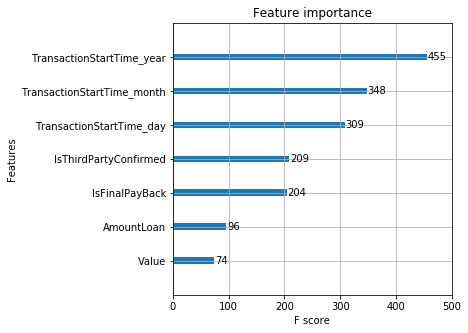

In [50]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
xgbo.plot_importance(xgb,max_num_features = 7, ax=ax).set_yticklabels(features)
